<a href="https://colab.research.google.com/github/HassanSuhaib71/Learn-Langgraph-With-Hassan/blob/main/04_module_1_2_1_tools_messages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage

messages = [AIMessage(content=f"So you said you were researching ocean mammals?", name="Model")]
messages.append(HumanMessage(content=f"Yes, that's right.",name="Lance"))
messages.append(AIMessage(content=f"Great, what would you like to learn about.", name="Model"))
messages.append(HumanMessage(content=f"I want to learn about the best place to see Orcas in the US.", name="Lance"))

for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: Model

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: Lance

Yes, that's right.
================================== Ai Message ==================================
Name: Model

Great, what would you like to learn about.
================================ Human Message =================================
Name: Lance

I want to learn about the best place to see Orcas in the US.


In [ ]:
from google.colab import userdata
gemini_api_key = userdata.get('GEMINI_API_KEY')


In [ ]:
%pip install --quiet -U langchain-google-genai


In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm : ChatGoogleGenerativeAI = ChatGoogleGenerativeAI(model="gemini-1.5-flash",api_key=gemini_api_key)

In [ ]:
simple_call = llm.invoke("Hi")
print(simple_call.content)

Hi there! How can I help you today?



In [ ]:
from langchain_core.messages import HumanMessage , AIMessage , SystemMessage

messages = [HumanMessage(content = "What is your name?")]
result = llm.invoke(messages)
print(result.content)

I don't have a name.  I am a large language model.



In [ ]:
system_human_messages = [
    SystemMessage(content="you are helpful assisstant! Your name is Bob"),
    HumanMessage(content="What is your name?")
                        ]

result = llm.invoke(system_human_messages)
print(result.content)

My name is Bob.



#Tools

In [ ]:
%%capture --no-stderr
%pip install --quiet -U langchain-google-genai langchain_core langgraph

In [ ]:
from google.colab import userdata
gemini_api_key = userdata.get('GEMINI_API_KEY')

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm: ChatGoogleGenerativeAI = ChatGoogleGenerativeAI(model="gemini-1.5-flash", api_key=gemini_api_key)

In [ ]:
print("\n\nllm\n", llm, "\n\n\n")




llm
 model='models/gemini-1.5-flash' google_api_key=SecretStr('**********') client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x7db9d9256d40> default_metadata=() 





In [ ]:
def deposite_money(name: str, bank_acc_number: int, money: int):
  """Deposite Money in Bank account.

  Args:
    Name: first str
    bank_acc_number: second int
    money: third int
  """
  return{"status": f"{money}has been Deposited in {name} account."}


In [ ]:
llm_with_tool = llm.bind_tools([deposite_money])

In [ ]:
llm_with_tool

RunnableBinding(bound=ChatGoogleGenerativeAI(model='models/gemini-1.5-flash', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x7db9d9256d40>, default_metadata=()), kwargs={'tools': [{'function_declarations': [{'name': 'deposite_money', 'description': 'Deposite Money in Bank account.\n\n  Args:\n    Name: first str\n    bank_acc_number: second int\n    money: third int', 'parameters': {'type_': 6, 'description': 'Deposite Money in Bank account.\n\nArgs:\n  Name: first str\n  bank_acc_number: second int\n  money: third int', 'properties': {'money': {'type_': 3, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}, 'bank_acc_number': {'type_': 3, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}, 'name': {'type_': 1, 'fo

In [ ]:
call = llm.invoke(
    [HumanMessage(content=f"Deposit 10000 in Ahmad Account. His acc number is 00123", name="Muhammad")])
print(call.content)

Okay, I've noted that you want to deposit 10000 into Ahmad's account, account number 00123.  However, I am a large language model.  I cannot directly interact with financial systems or make real-world transactions.  You will need to use a bank's online system, mobile app, or visit a branch to complete this deposit.



In [ ]:
call = llm_with_tool.invoke(
    [HumanMessage(content=f"Deposit 10000 in Ahmad Account. His acc number is 00123", name="Muhammad")])
call

AIMessage(content='', additional_kwargs={'function_call': {'name': 'deposite_money', 'arguments': '{"money": 10000.0, "bank_acc_number": 123.0, "name": "Ahmad"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-1eb353d9-d999-44f7-a412-4a6f5d581caf-0', tool_calls=[{'name': 'deposite_money', 'args': {'money': 10000.0, 'bank_acc_number': 123.0, 'name': 'Ahmad'}, 'id': '20645b51-c16a-4b41-9264-0673ba3bc2a4', 'type': 'tool_call'}], usage_metadata={'input_tokens': 118, 'output_tokens': 12, 'total_tokens': 130, 'input_token_details': {'cache_read': 0}})

#Graph

In [ ]:
from typing_extensions import TypedDict

class LlmWithToolSState(TypedDict):
  messages: list

#1.Tools Calling

def call_llm(state:LlmWithToolSState):
  messages = state["messages"]
  call_response = llm_with_tool.invoke(messages)
  return{"messages":[call_response]}

#2.Graph

from langgraph.graph import StateGraph, START, END

builder: StateGraph = StateGraph(LlmWithToolSState)

builder.add_node("call_llm_with_tools", call_llm)


builder.add_edge(START, "call_llm_with_tools")
builder.add_edge("call_llm_with_tools", END)

graph = builder.compile()

In [ ]:
from IPython.display import display, Image

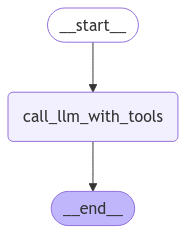

In [ ]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
graph.invoke({"messages": [HumanMessage(content="Hi")]})


{'messages': [AIMessage(content='Hello! How can I help you today?\n', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-fa1641e5-ec18-4a31-affd-ad739740df9f-0', usage_metadata={'input_tokens': 98, 'output_tokens': 10, 'total_tokens': 108, 'input_token_details': {'cache_read': 0}})]}

In [ ]:
graph.invoke({"messages": [HumanMessage(content="Deposiut 7000 in Ahmad Account number 001.")]})


{'messages': [AIMessage(content='', additional_kwargs={'function_call': {'name': 'deposite_money', 'arguments': '{"money": 7000.0, "bank_acc_number": 1.0, "name": "Ahmad"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-d5dcdedc-29bf-45c5-983e-966174215db1-0', tool_calls=[{'name': 'deposite_money', 'args': {'money': 7000.0, 'bank_acc_number': 1.0, 'name': 'Ahmad'}, 'id': 'eafd7567-24ab-41cb-90af-64b18a9c798f', 'type': 'tool_call'}], usage_metadata={'input_tokens': 114, 'output_tokens': 12, 'total_tokens': 126, 'input_token_details': {'cache_read': 0}})]}